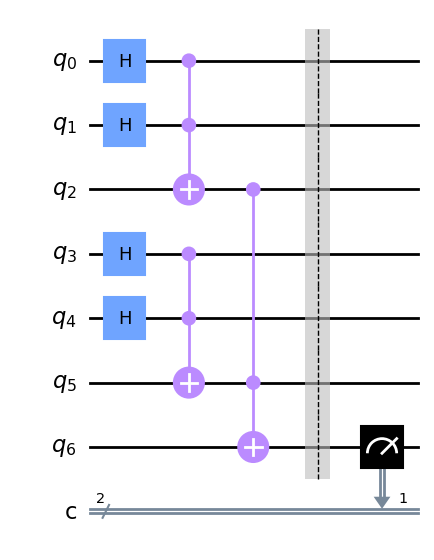

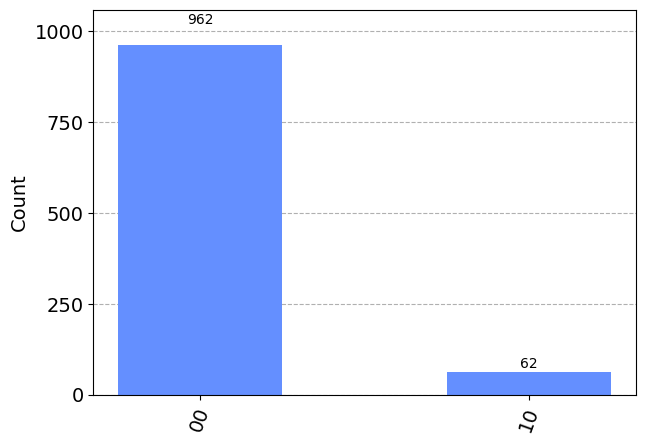

In [11]:
"""quantum_circuit3.ipynb"""

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# built and imported from IBM composer 
qreg_q = QuantumRegister(7, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# circuit pieces, left to right
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.ccx(qreg_q[3], qreg_q[4], qreg_q[5])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[5], qreg_q[6])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6])
circuit.measure(qreg_q[6], creg_c[1])

display(circuit.draw("mpl")) 

# Use Aer's qasm_simulator # generic simulator that allows counts
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator, with 1024 shots
job = execute(circuit, simulator, shots=1024) # built in function

result = job.result() # need to recall count

counts = result.get_counts(circuit)

plot_histogram(counts)



In [12]:
First, the Hadamard gate produces equal probabilities of being 0 or 1. 
Then there is a CCX gate that flips q5, but only when 3 and 4 are 1.
Then, there are two more CCX gates that force the state of qubit 6 to be flipped if all of the other qubits are in state 1. 

Quantum noise could interfere with these results due to inherent uncertainty and inaccuracy. 
As shown above, this circuit produces a pathway that prompts q6 to be 1. The noise interferes with the results, such as errors in the gates or  the qubits becoming impure. 

Attributions:
https://en.wikipedia.org/wiki/One_Clean_Qubit
ForeFrontAI
https://arxiv.org/abs/2304.02358
https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.QasmSimulator.html

SyntaxError: invalid syntax (4252484796.py, line 1)